In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 928 (delta 20), reused 23 (delta 11), pack-reused 896
Receiving objects: 100% (928/928), 50.30 MiB | 33.02 MiB/s, done.
Resolving deltas: 100% (407/407), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.05,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [5]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [6]:
my_generator = generate_train_data(5,'examples/legacy/data/train','image','label',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [7]:
# save space on device
#! rm -rf aug

In [8]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-3, metrics=['accuracy'], loss='binary_crossentropy')

In [10]:
history = train(model, my_generator, epochs = 10, steps_per_epoch=200,verbose=1, save_as="unet_segment.hdf5")

Epoch 1/10
200/200 [==============================] - 26s 132ms/step - loss: 0.2566 - accuracy: 0.7911
Epoch 2/10
200/200 [==============================] - 27s 136ms/step - loss: 0.1999 - accuracy: 0.8172
Epoch 3/10
200/200 [==============================] - 26s 130ms/step - loss: 0.1848 - accuracy: 0.8233
Epoch 4/10
200/200 [==============================] - 27s 134ms/step - loss: 0.1754 - accuracy: 0.8268
Epoch 5/10
200/200 [==============================] - 26s 132ms/step - loss: 0.1681 - accuracy: 0.8300
Epoch 6/10
200/200 [==============================] - 26s 132ms/step - loss: 0.1632 - accuracy: 0.8319
Epoch 7/10
200/200 [==============================] - 27s 137ms/step - loss: 0.1581 - accuracy: 0.8339
Epoch 8/10
200/200 [==============================] - 26s 130ms/step - loss: 0.1542 - accuracy: 0.8353
Epoch 9/10
200/200 [==============================] - 27s 137ms/step - loss: 0.1500 - accuracy: 0.8367
Epoch 10/10
200/200 [==============================] - 26s 130ms/step - l

In [ ]:
#model.save("unet_segment.hdf5")

In [11]:
results = predict(model_object=unet(),test_path="examples/legacy/data/test",
                  model_weights="unet_segment.hdf5",
                  image_length=30, image_suffix="png")

30/30 [==============================] - 1s 25ms/step


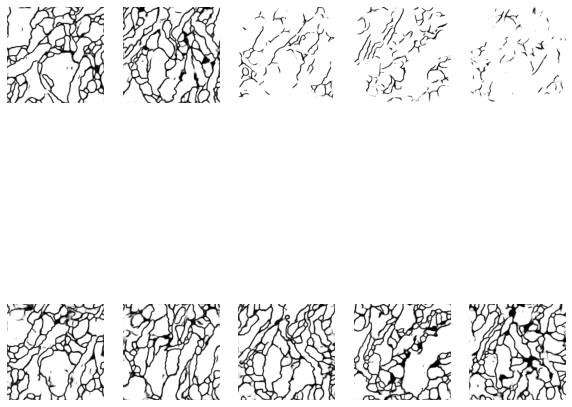

In [12]:
show_images(results, number = 10 )